In [1]:
import numpy as np                     
import matplotlib.pyplot as plt         
from scipy.stats import powerlaw, zscore, rankdata  


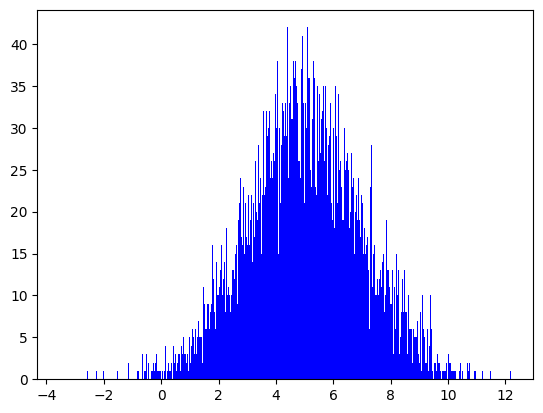

In [ ]:
# A. Gaussian distribution (mean = 5, std = 2)
B = np.random.normal(loc=5, scale=2, size=10000)# Most values near 5, and change by +-2 SD
# A= np.random.exponential( scale=1, size=10000)
# C=np.random.uniform(low =0, high= 10, size = 10000)
plt.hist(B, bins = 1000, color = 'blue')
plt.show()
# plt.hist(A, bins = 100, color='pink')
# # plt.show()
# plt.hist(C, bins = 100, color='green')
# plt.show()

# on chnanging the bins to 1000, we can see the distribution more clearly
# changin g the loctaion of distribution changes the mean, and changing the scale changes the standard deviation

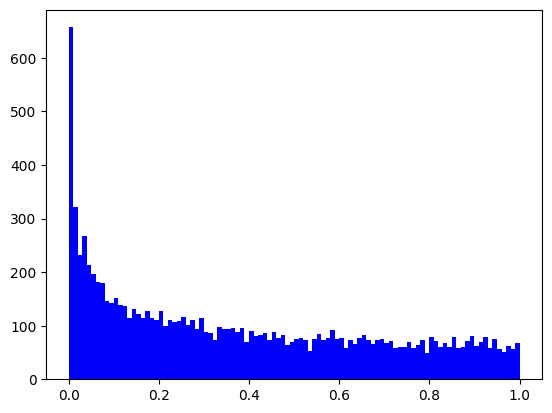

In [19]:
# B. Power law distribution 
I = powerlaw.rvs(a=0.6, size=10000)
plt.hist(I, bins = 100, color='blue')
plt.show()

# a= 1 rectangle graph.
# a< 1 left to right decreasing the values
# a> 1 right to left decreasing the values

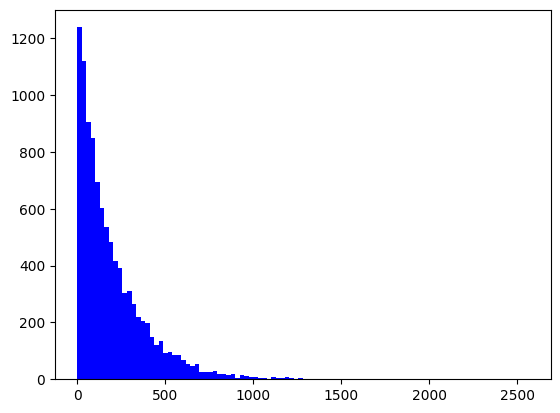

In [18]:
# C. Geometric distribution 
H = np.random.geometric(p=0.005, size=10000)
plt.hist(H, bins = 100, color='blue')
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_5400\1829088276.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([B, I, H], labels=['Gaussian (B)', 'Power Law (I)', 'Geometric (H)'])


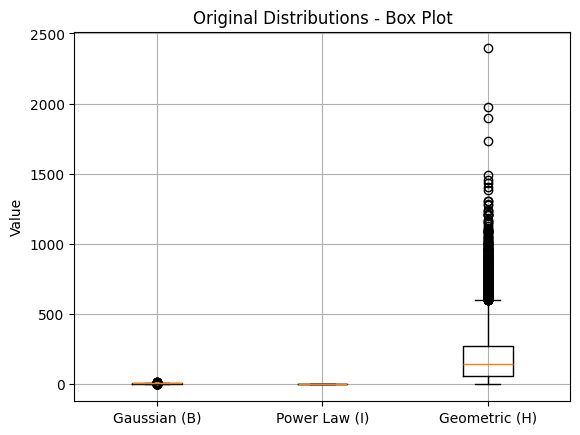

In [5]:
# Step 3: Plot initial distributions (Box Plot)

plt.boxplot([B, I, H], labels=['Gaussian (B)', 'Power Law (I)', 'Geometric (H)'])
plt.title('Original Distributions - Box Plot')
plt.ylabel('Value')
plt.grid()
plt.show()


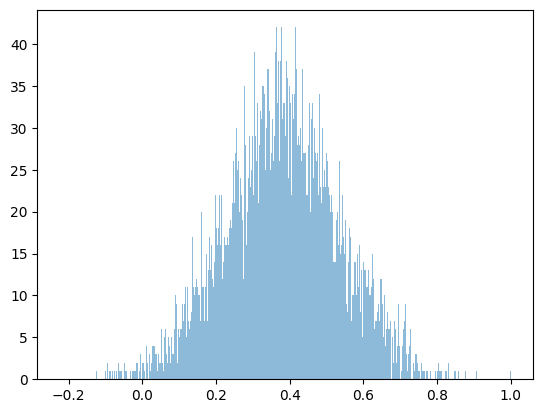

In [ ]:
# normalization methods

def normalize_by_max(x):
    return x / np.max(x)

norm_max = normalize_by_max(B)
plt.hist(norm_max, bins=1000, alpha=0.5, label='B (Max Normalized)')
plt.show()

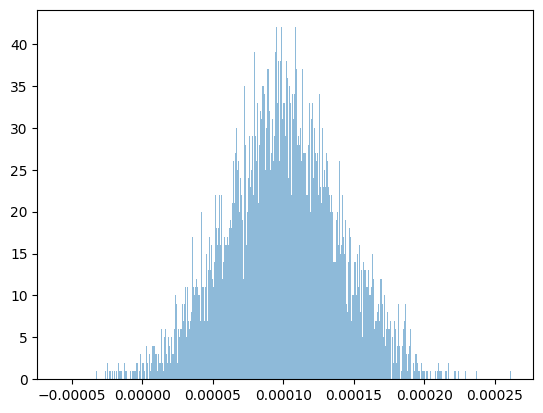

In [ ]:
def normalize_by_sum(x):
    return x / np.sum(x)

norm_sum = normalize_by_sum(B)
plt.hist(norm_sum, bins=1000, alpha=0.5, label='B (Sum Normalized)')
plt.show()

In [8]:
def normalize_by_zscore(x):
    return zscore(x)


In [9]:

def normalize_by_percentile(x):
    return rankdata(x) / len(x)

In [52]:
#making the medaians same (normalizesd)
def normalize_by_equal_median(*arrays):
    medians = [np.median(x) for x in arrays]
    m1 = np.mean(medians)
    result = []
    for x,m in zip(arrays, medians):
        scale = m1 / m
        normalized_array = x * scale
        result.append(normalized_array)
    return result,m1

# norm1, norm2 = normalize_by_equal_median([B, I])

# plt.hist(norm1, bins=100, alpha=0.6, label='Normalized arr1')
# plt.hist(norm2, bins=100, alpha=0.6, label='Normalized arr2')
# plt.show()

In [59]:
def quantile_normalize(*arrays):
    
    arrays = np.vstack(arrays)
    sorted_arrays = np.sort(arrays, axis=1)
    mean_sorted = np.mean(sorted_arrays, axis=0)
    result = []
    for arr in arrays:
        ranks = rankdata(arr, method='min') - 1 
        result.append(mean_sorted[ranks])
    return result

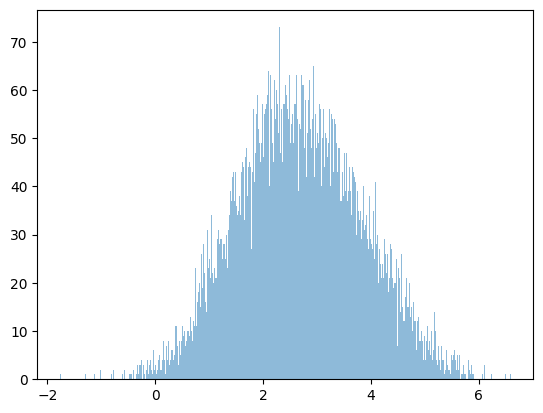

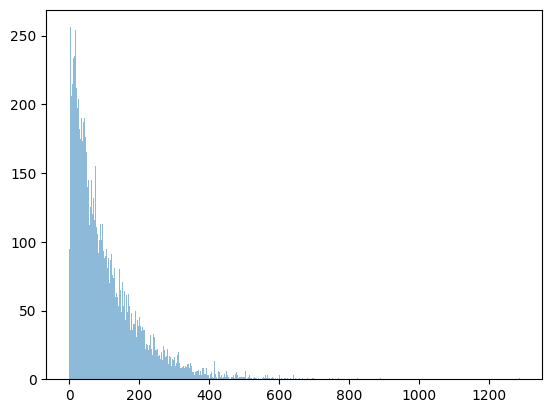

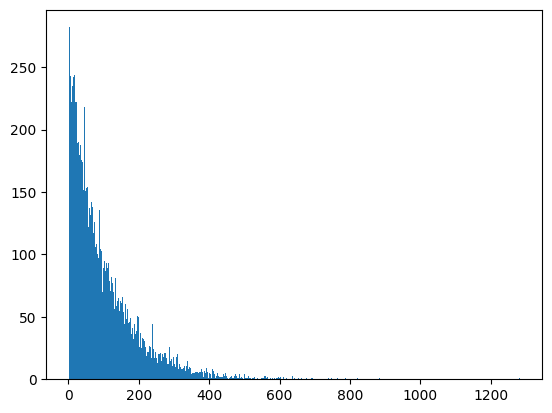

In [60]:
#B= gaussian, I= power law, H= geometric
plt.hist(quantile_normalize([B,I])[0], bins=500, alpha=0.5, label='B (Quantile Normalized)')
plt.show()
plt.hist(quantile_normalize([B,H])[0], bins=500, alpha=0.5, label='B (Quantile Normalized)')
plt.show()
plt.hist(quantile_normalize([H,I])[0], bins=500, alpha=1, label='B (Quantile Normalized)')
plt.show()


In [ ]:
def plot_histogram_comparison(original, normalized, title):
    plt.hist(original, bins=1000, alpha=0.5, label='Original')
    plt.hist(normalized, bins= 1000, alpha=0.5, label='Normalized')
    plt.title(f'Histogram: {title}')
    plt.show()

In [ ]:
def plot_boxplot_of_all(arrays, labels, title):
    plt.boxplot(arrays, labels=labels)
    plt.title(title)
    plt.show()

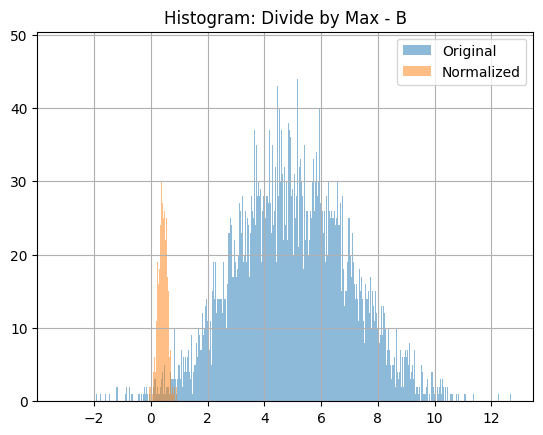

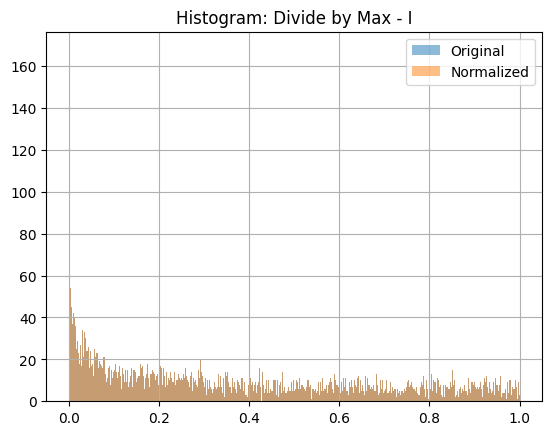

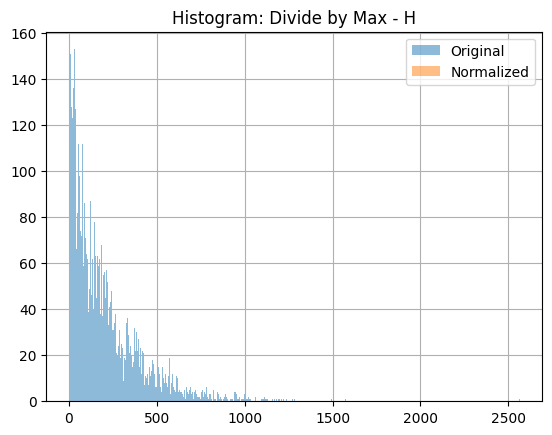

C:\Users\hp\AppData\Local\Temp\ipykernel_5400\1099292294.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(arrays, labels=labels)


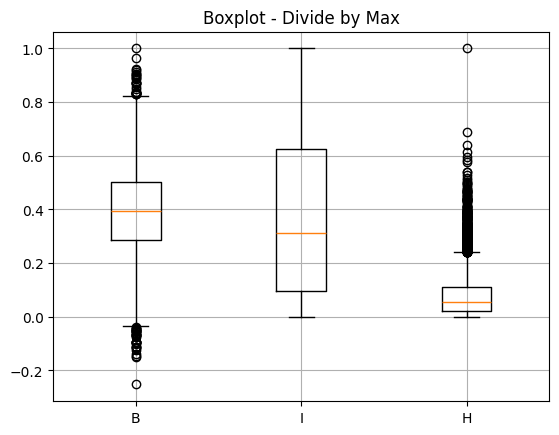

In [ ]:

#Divide by Max 
plot_histogram_comparison(B, normalize_by_max(B), 'Divide by Max - B')
plot_histogram_comparison(I, normalize_by_max(I), 'Divide by Max - I')
plot_histogram_comparison(H, normalize_by_max(H), 'Divide by Max - H')
plot_boxplot_of_all(
    [normalize_by_max(B), normalize_by_max(I), normalize_by_max(H)],
    labels=['B', 'I', 'H'], title='Boxplot - Divide by Max'
)



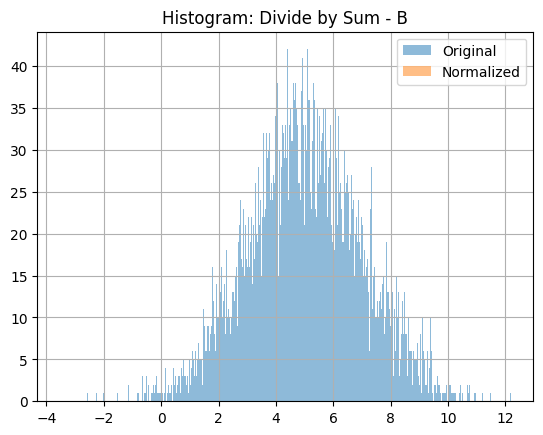

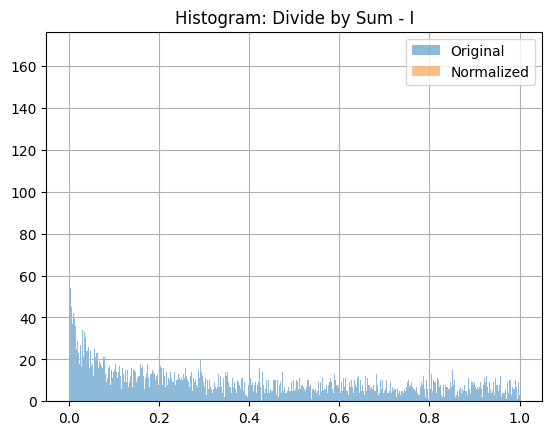

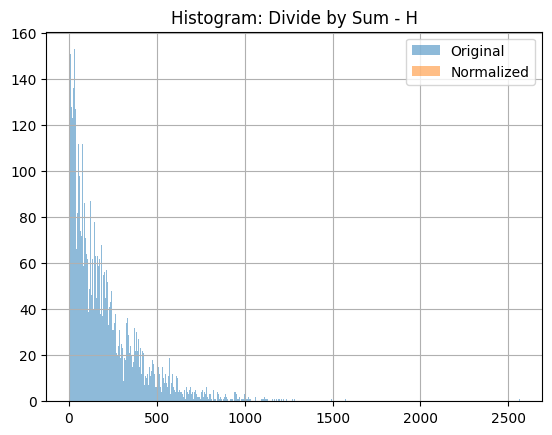

C:\Users\hp\AppData\Local\Temp\ipykernel_5400\1099292294.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(arrays, labels=labels)


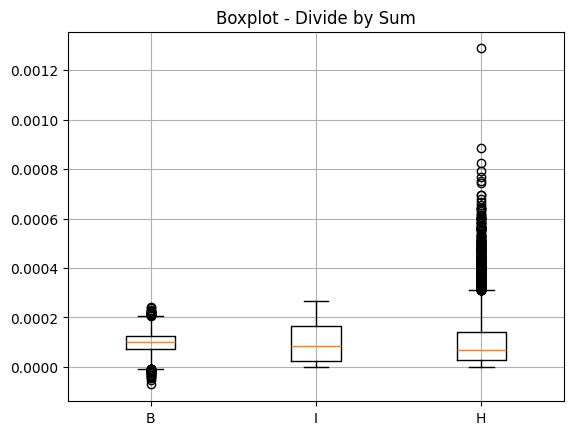

In [ ]:

#  Divide by Sum
plot_histogram_comparison(B, normalize_by_sum(B), 'Divide by Sum - B')
plot_histogram_comparison(I, normalize_by_sum(I), 'Divide by Sum - I')
plot_histogram_comparison(H, normalize_by_sum(H), 'Divide by Sum - H')
plot_boxplot_of_all([normalize_by_sum(B), normalize_by_sum(I), normalize_by_sum(H)],labels = ['B', 'I', 'H'], title='Boxplot - Divide by Sum')

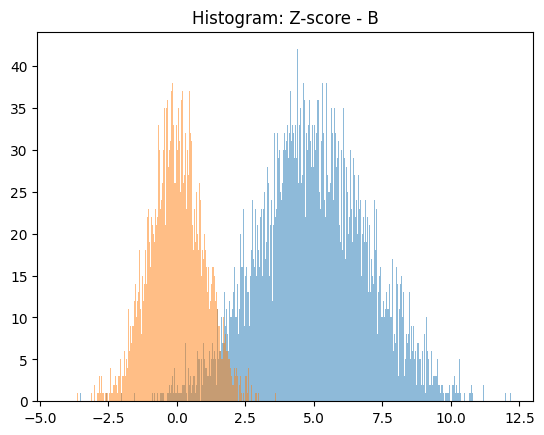

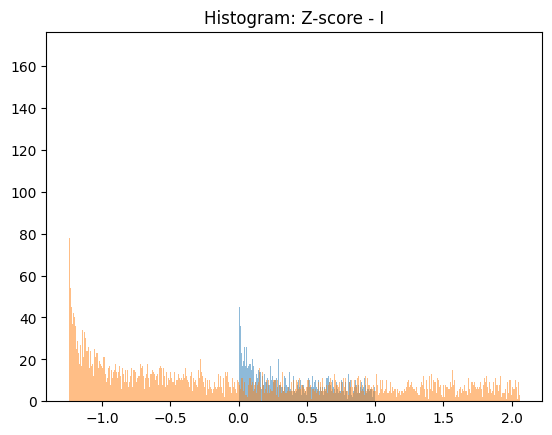

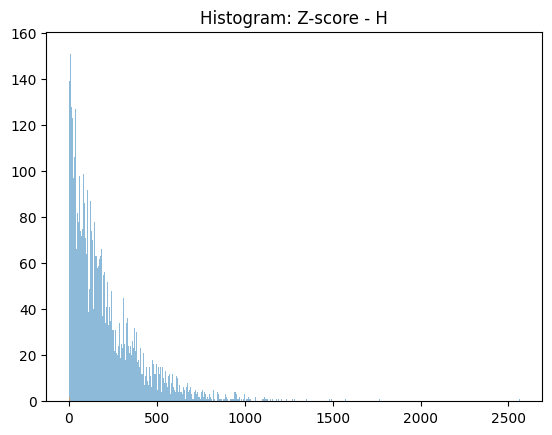

C:\Users\hp\AppData\Local\Temp\ipykernel_5400\1099292294.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(arrays, labels=labels)


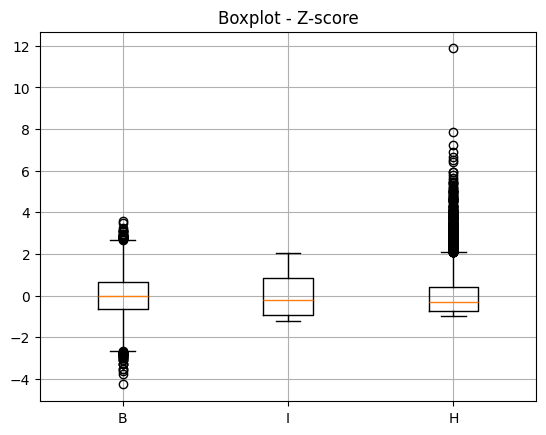

In [46]:

# Z-score
plot_histogram_comparison(B, normalize_by_zscore(B), 'Z-score - B')
plot_histogram_comparison(I, normalize_by_zscore(I), 'Z-score - I')
plot_histogram_comparison(H, normalize_by_zscore(H), 'Z-score - H')
plot_boxplot_of_all([normalize_by_zscore(B), normalize_by_zscore(I), normalize_by_zscore(H)],
                    labels=['B', 'I', 'H'], title='Boxplot - Z-score')

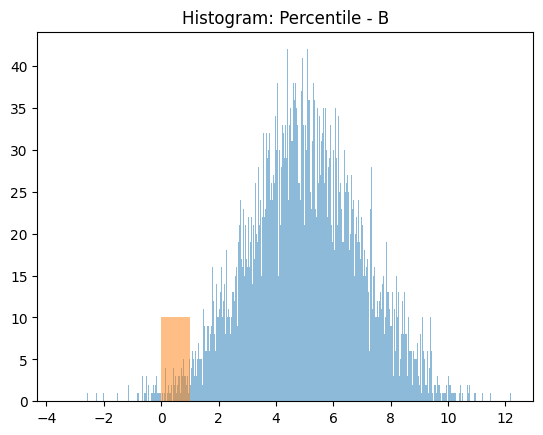

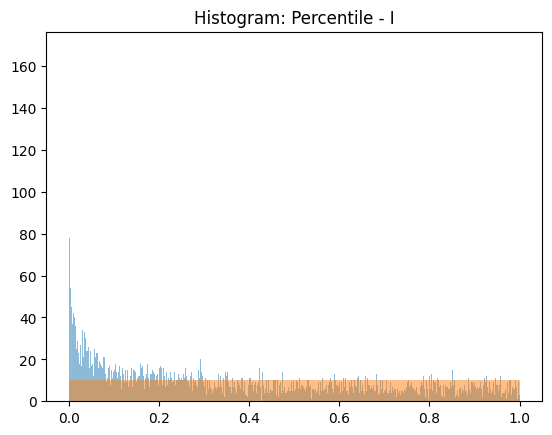

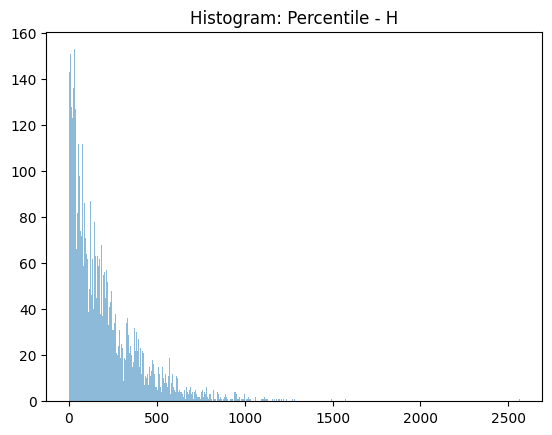

C:\Users\hp\AppData\Local\Temp\ipykernel_5400\1099292294.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(arrays, labels=labels)


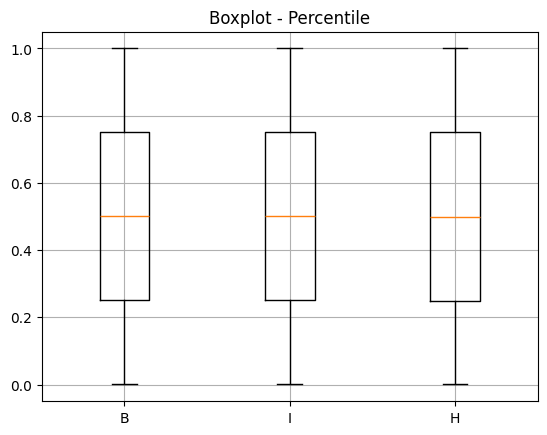

In [ ]:
# Percentiles
plot_histogram_comparison(B, normalize_by_percentile(B), 'Percentile - B')
plot_histogram_comparison(I, normalize_by_percentile(I), 'Percentile - I')
plot_histogram_comparison(H, normalize_by_percentile(H), 'Percentile - H')
plot_boxplot_of_all([normalize_by_percentile(B), normalize_by_percentile(I), normalize_by_percentile(H)],
                    labels=['B', 'I', 'H'], title='Boxplot - Percentile')

Target median (m1): 47.4322


C:\Users\hp\AppData\Local\Temp\ipykernel_5400\1099292294.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(arrays, labels=labels)


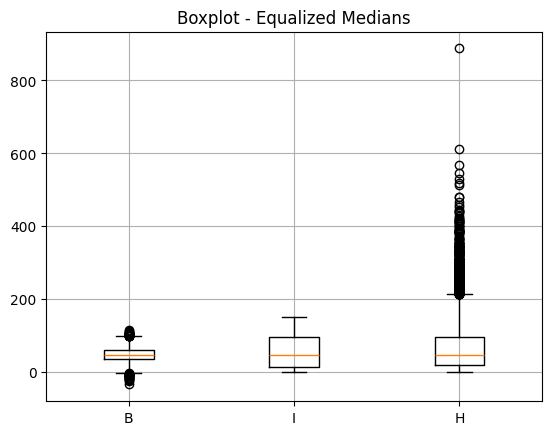

In [53]:
#  Equalize Medians
[B_eq, I_eq, H_eq], m1 = normalize_by_equal_median(B, I, H)
print(f"Target median (m1): {m1:.4f}")
plot_boxplot_of_all([B_eq, I_eq, H_eq], labels=['B', 'I', 'H'], title='Boxplot - Equalized Medians')


In [54]:

# Quantile Normalization 
arrays_qn = quantile_normalize(np.vstack([B, I, H]))
plot_boxplot_of_all(*arrays_qn, labels=['B', 'I', 'H'], title='Boxplot - Quantile Normalized')
plt.hist(arrays_qn[0], bins=50, alpha=0.5, label='B (Quantile Normalized)', color= 'blue')
plt.show()
plt.hist(arrays_qn[1], bins=50, alpha=0.5, label='I (Quantile Normalized)', color= 'green')
plt.show()
plt.hist(arrays_qn[2], bins=50, alpha=0.5, label='H (Quantile Normalized)', color='orange')
plt.show()

IndexError: index 17030 is out of bounds for axis 0 with size 3